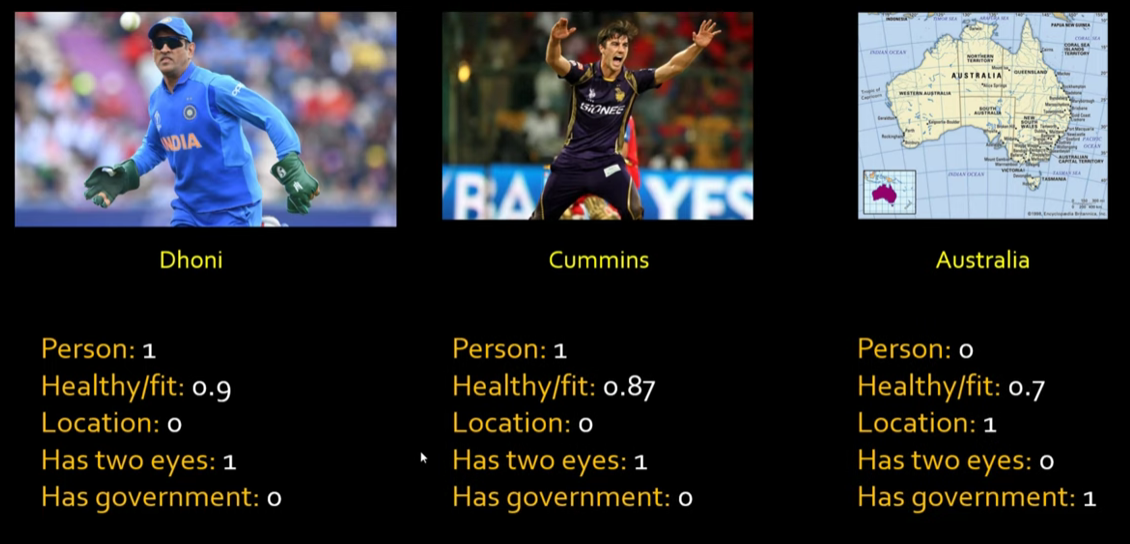

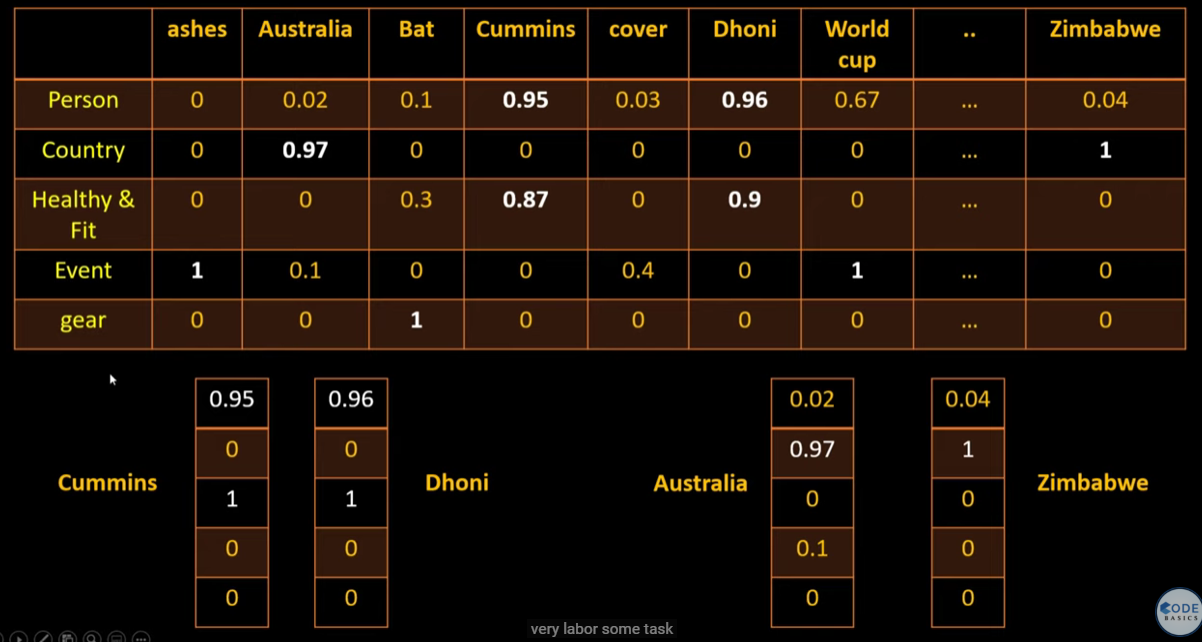

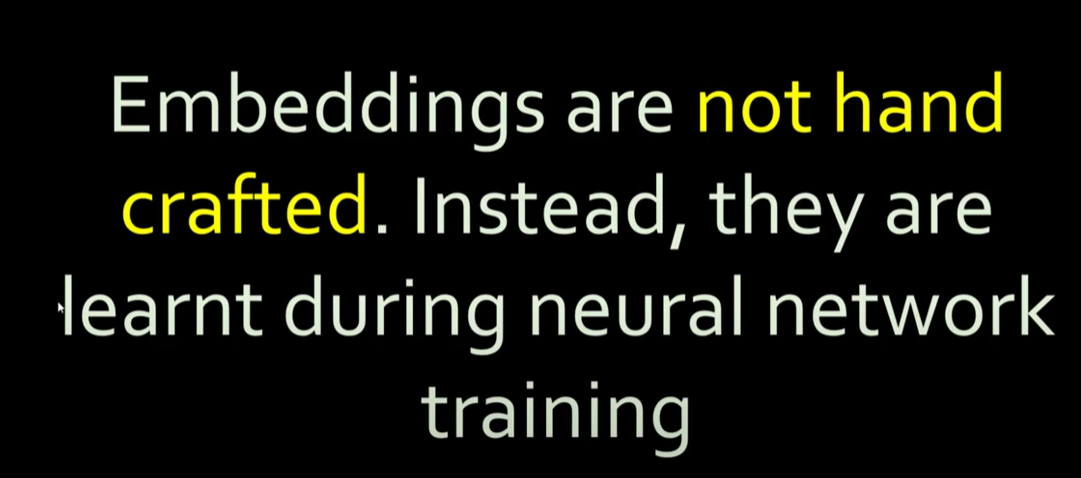

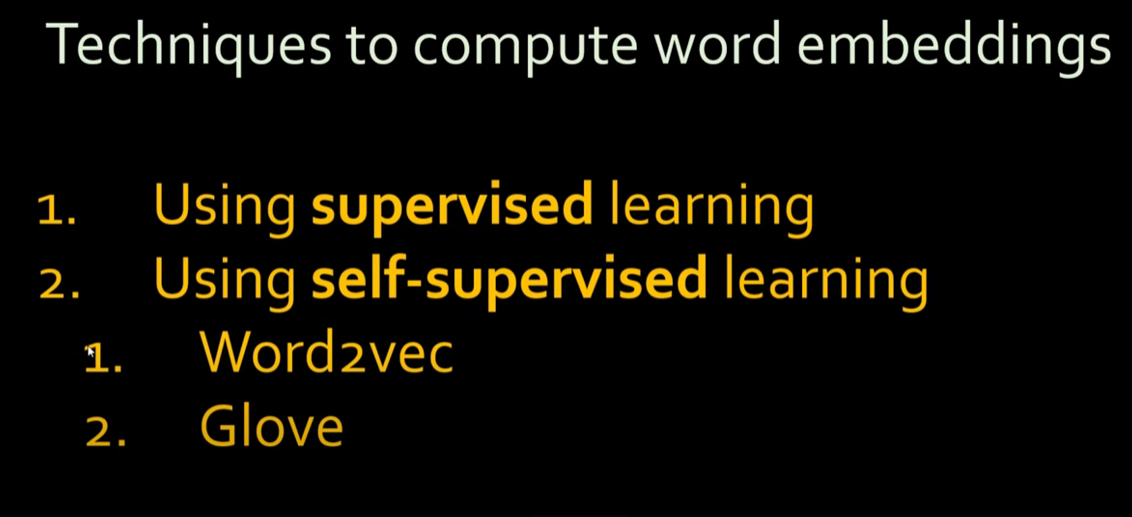

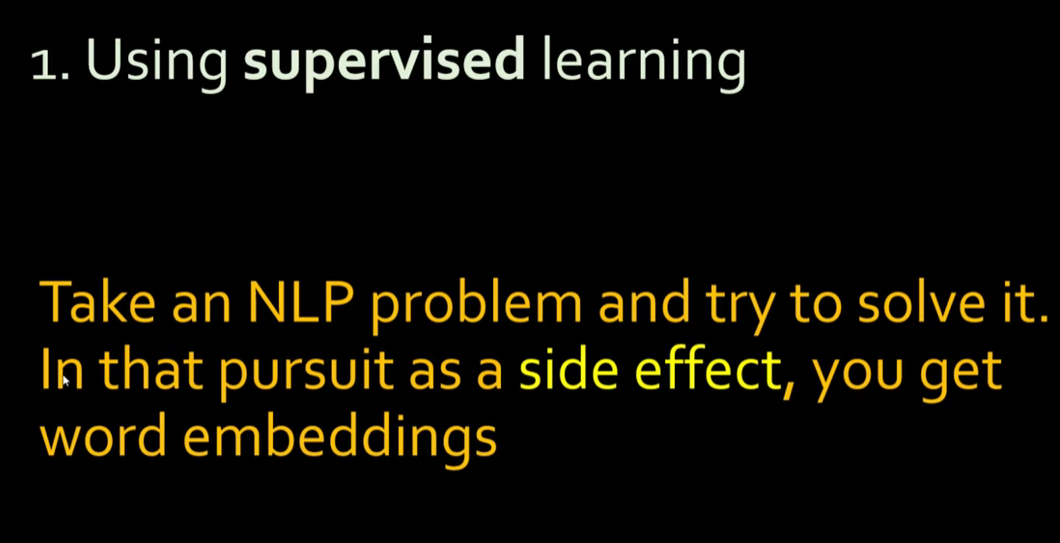

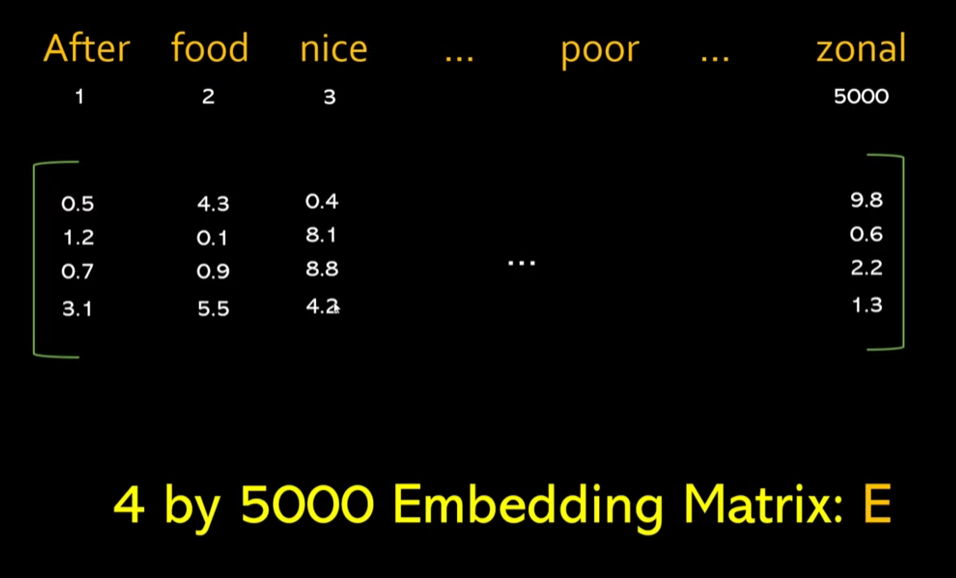

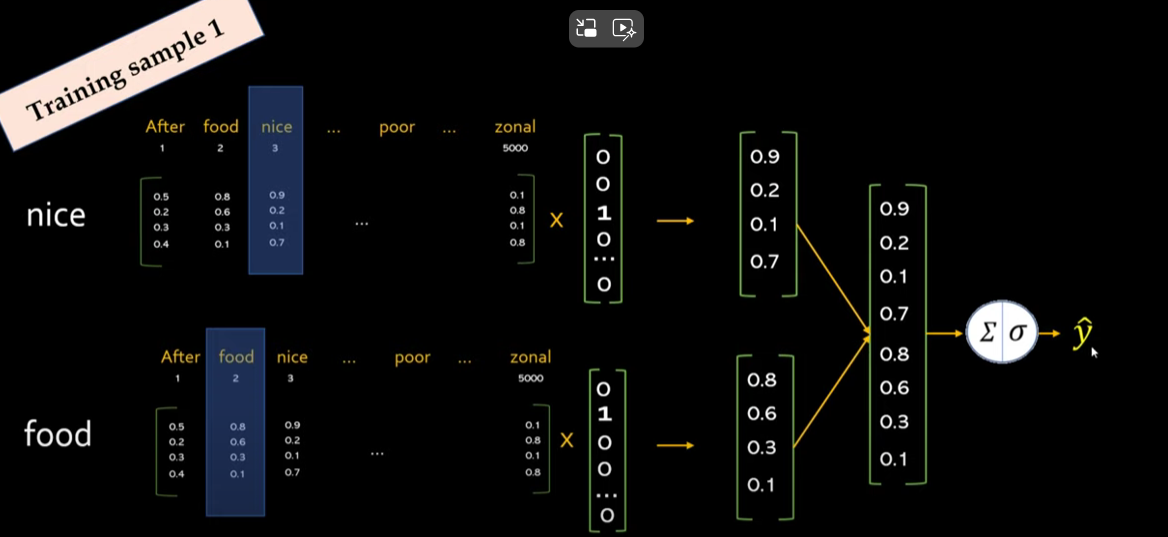

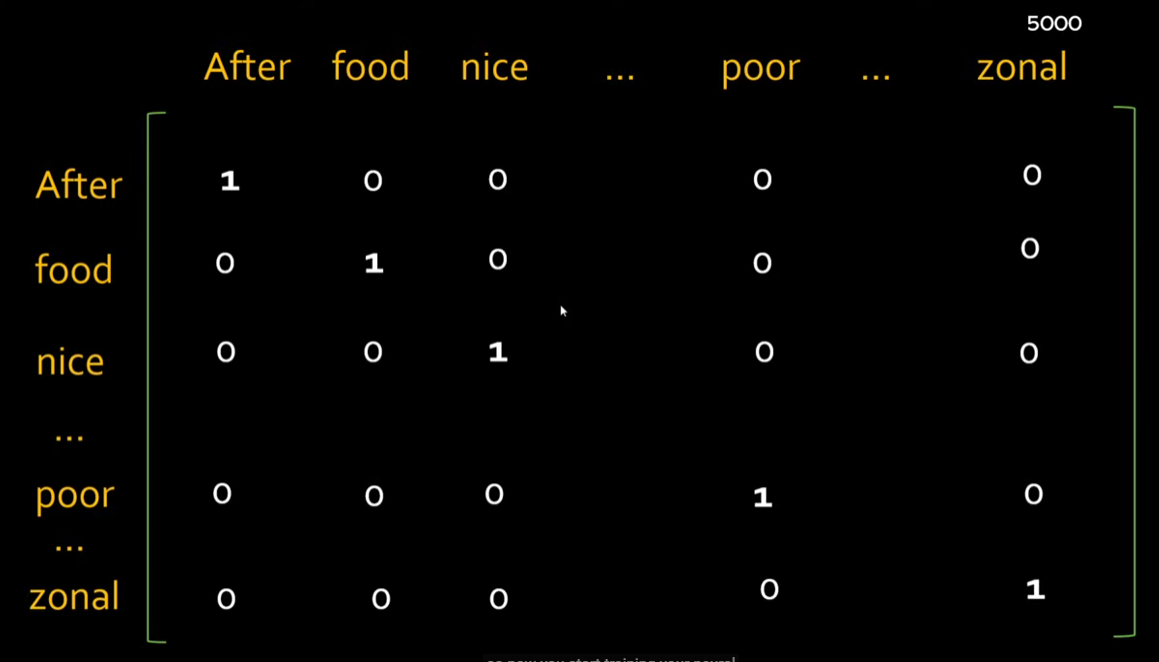

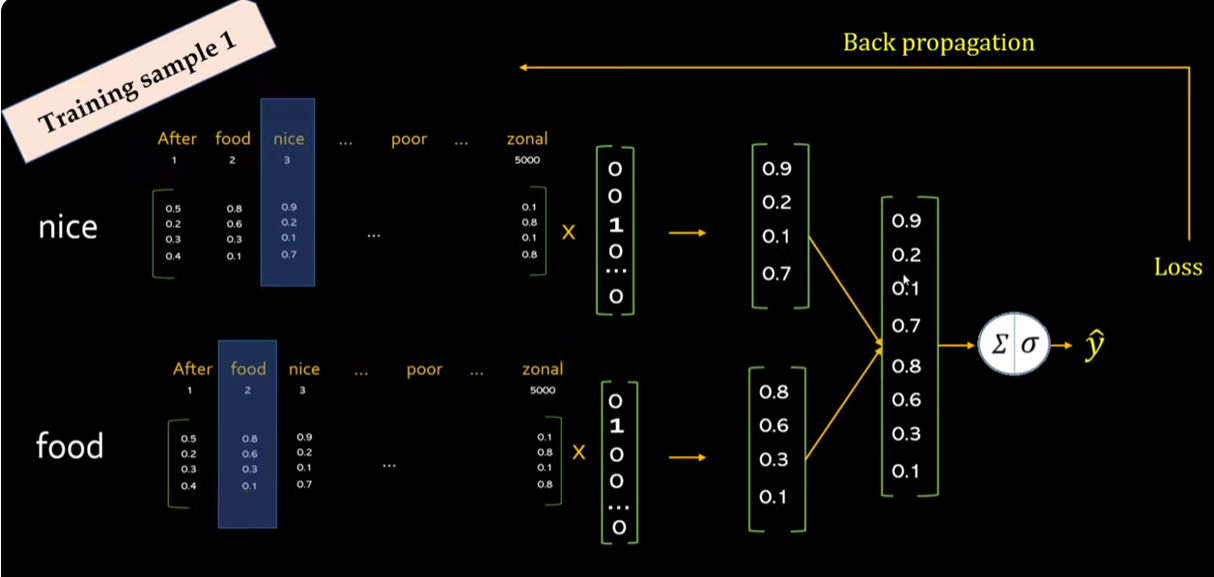

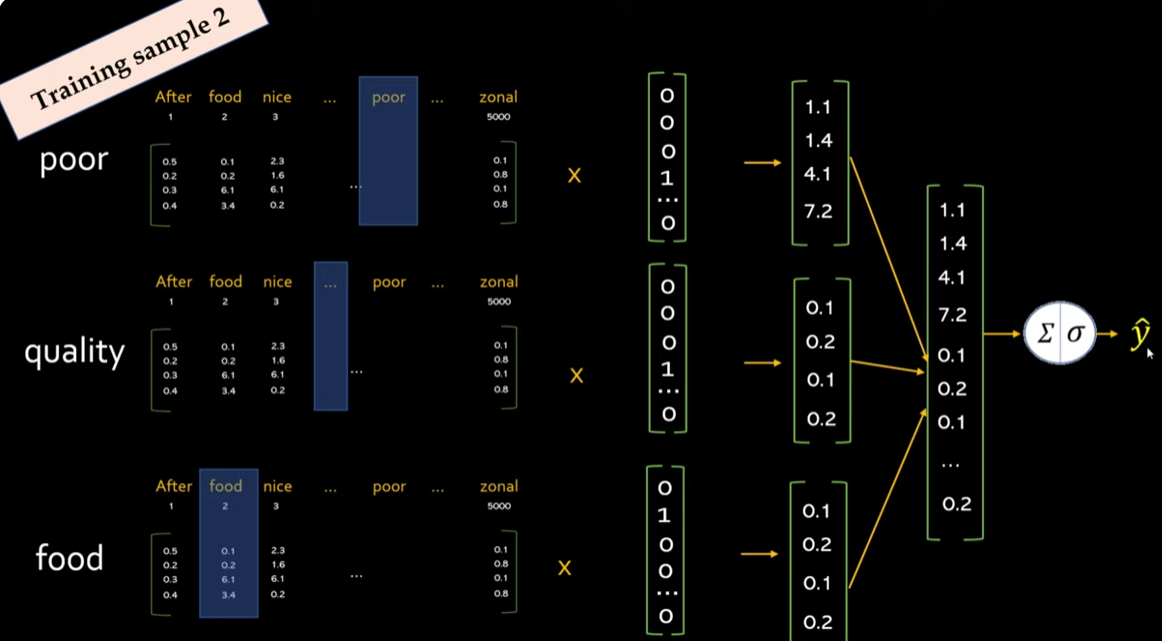

**we'll take padding to match nureal network architecture**

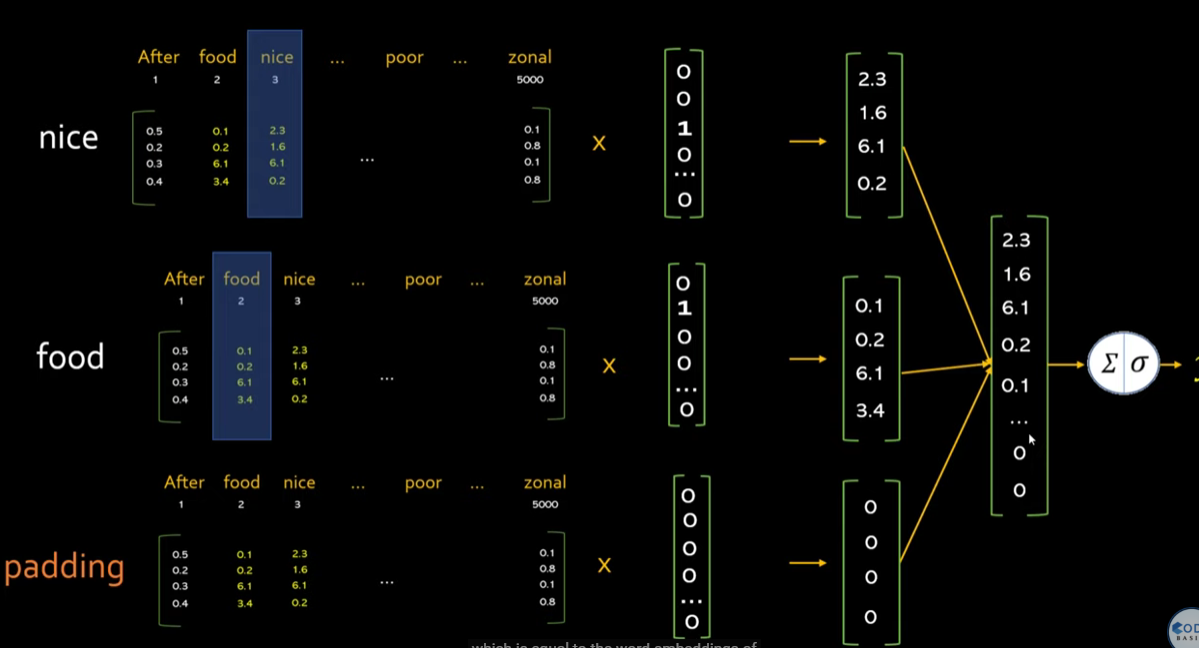

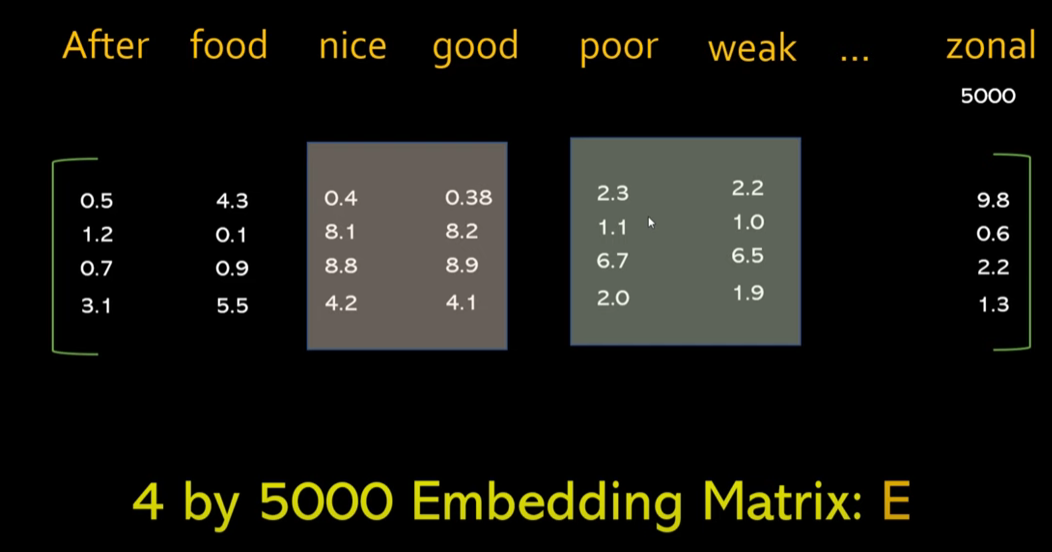

https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding


In [3]:
reviews = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']

sentiment=np.array([1,1,1,1,1,0,0,0,0,0])


In [4]:
one_hot("Good work",30) # random number between the number

[9, 25]

In [5]:
vocab_size=30
encoded_reviews=[one_hot(d,vocab_size) for d in reviews]
encoded_reviews

[[7, 5],
 [9, 25],
 [23, 19],
 [6, 25],
 [19],
 [24],
 [4, 19],
 [6, 9],
 [4, 25],
 [22, 29, 5, 3]]

In [8]:
max_length=4
padded_reviews=pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
padded_reviews

array([[ 7,  5,  0,  0],
       [ 9, 25,  0,  0],
       [23, 19,  0,  0],
       [ 6, 25,  0,  0],
       [19,  0,  0,  0],
       [24,  0,  0,  0],
       [ 4, 19,  0,  0],
       [ 6,  9,  0,  0],
       [ 4, 25,  0,  0],
       [22, 29,  5,  3]])

In [9]:
embedded_vector_size = 5
model = Sequential()

model.add(Embedding(vocab_size, embedded_vector_size, input_length=max_length, name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(padded_reviews, sentiment, epochs=50, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 5)              150       
                                                                 
 flatten (Flatten)           (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [13]:
weights=model.get_layer("embedding").get_weights()[0]

In [14]:
len(weights)

30

In [16]:
weights[23]

array([-0.02113692,  0.00224748, -0.02997492,  0.09684388,  0.00112141],
      dtype=float32)

In [17]:
weights[6]

array([-0.01323812, -0.02271974,  0.07431392, -0.03084386, -0.08496615],
      dtype=float32)